In [1]:
# Import necessary libraries
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
# File path
file_dir = '.\\data\\source\\6_dB_slider\\slider\\id_00\\abnormal\\'
file_name = '00000000.wav'
file_path = os.path.join(file_dir, file_name)

In [3]:
help(librosa.load)

Help on function load in module librosa.core.audio:

load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
    Load an audio file as a floating point time series.
    
    Audio will be automatically resampled to the given rate
    (default ``sr=22050``).
    
    To preserve the native sampling rate of the file, use ``sr=None``.
    
    Parameters
    ----------
    path : string, int, pathlib.Path or file-like object
        path to the input file.
    
        Any codec supported by `soundfile` or `audioread` will work.
    
        Any string file paths, or any object implementing Python's
        file interface (e.g. `pathlib.Path`) are supported as `path`.
    
        If the codec is supported by `soundfile`, then `path` can also be
        an open file descriptor (int).
    
        On the contrary, if the codec is not supported by `soundfile`
        (for example, MP3), then `path` must be a file path (string or `pat

In [4]:
# Load the audio file 
signal, fs = librosa.load(file_path, sr=None)
print(f"File duration: {librosa.get_duration(filename=file_path)} s, fs={fs} Hz")

File duration: 10.0 s, fs=16000 Hz


In [5]:
help(plt.axes)

Help on function axes in module matplotlib.pyplot:

axes(arg=None, **kwargs)
    Add an axes to the current figure and make it the current axes.
    
    Call signatures::
    
        plt.axes()
        plt.axes(rect, projection=None, polar=False, **kwargs)
        plt.axes(ax)
    
    Parameters
    ----------
    arg : None or 4-tuple
        The exact behavior of this function depends on the type:
    
        - *None*: A new full window axes is added using
          ``subplot(**kwargs)``.
        - 4-tuple of floats *rect* = ``[left, bottom, width, height]``.
          A new axes is added with dimensions *rect* in normalized
          (0, 1) units using `~.Figure.add_axes` on the current figure.
    
    projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, optional
        The projection type of the `~.axes.Axes`. *str* is the name of
        a custom projection, see `~matplotlib.projections`. The default
        None results in a 'rectili

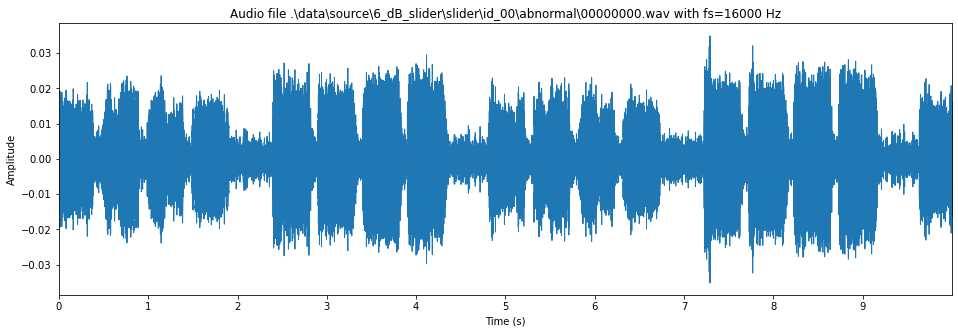

In [6]:
# Plot the signal
plt.figure(figsize=(16,5))
plt.subplot(111)
librosa.display.waveplot(signal, sr=fs)
plt.title(f"Audio file {file_path} with fs={fs} Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

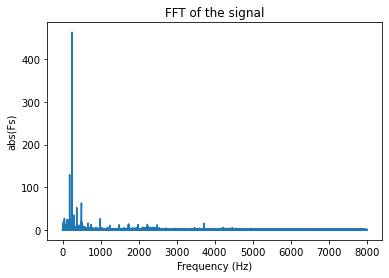

In [7]:
# Compute and plot the FFT
sig_fft = np.fft.fft(signal)
freq = np.linspace(0, fs, len(sig_fft))

sig_fft_left = sig_fft[:len(freq)//2]
freq_left = freq[:len(freq)//2]

plt.plot(freq_left, abs(sig_fft_left))
plt.title("FFT of the signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("abs(Fs)")
plt.show()

In [8]:
help(librosa.display.specshow)

Help on function specshow in module librosa.display:

specshow(data, x_coords=None, y_coords=None, x_axis=None, y_axis=None, sr=22050, hop_length=512, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12, key='C:maj', Sa=None, mela=None, thaat=None, auto_aspect=True, htk=False, ax=None, **kwargs)
    Display a spectrogram/chromagram/cqt/etc.
    
    For a detailed overview of this function, see :ref:`sphx_glr_auto_examples_plot_display.py`
    
    Parameters
    ----------
    data : np.ndarray [shape=(d, n)]
        Matrix to display (e.g., spectrogram)
    
    sr : number > 0 [scalar]
        Sample rate used to determine time scale in x-axis.
    
    hop_length : int > 0 [scalar]
        Hop length, also used to determine time scale in x-axis
    
    x_axis, y_axis : None or str
        Range for the x- and y-axes.
    
        Valid types are:
    
        - None, 'none', or 'off' : no axis decoration is displayed.
    
        Frequency types:
    
        - 'linear', 'fft', 

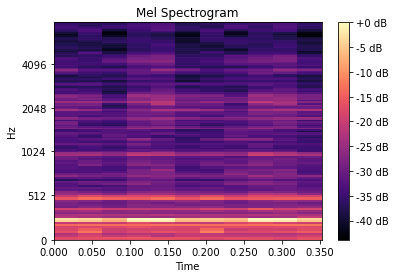

In [9]:
# Compute and plot mel spectogram
win_length = int(2*fs)
n_fft = win_length
hop_length = win_length//2
mel_spect = librosa.feature.melspectrogram(y=signal, sr=fs, win_length=win_length, n_fft=n_fft, hop_length=hop_length)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, sr=fs, x_axis='time', y_axis='mel');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

In [10]:
help(librosa.feature.mfcc)

Help on function mfcc in module librosa.feature.spectral:

mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
    Mel-frequency cepstral coefficients (MFCCs)
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)] or None
        audio time series
    
    sr : number > 0 [scalar]
        sampling rate of ``y``
    
    S : np.ndarray [shape=(d, t)] or None
        log-power Mel spectrogram
    
    n_mfcc: int > 0 [scalar]
        number of MFCCs to return
    
    dct_type : {1, 2, 3}
        Discrete cosine transform (DCT) type.
        By default, DCT type-2 is used.
    
    norm : None or 'ortho'
        If ``dct_type`` is `2 or 3`, setting ``norm='ortho'`` uses an ortho-normal
        DCT basis.
    
        Normalization is not supported for ``dct_type=1``.
    
    lifter : number >= 0
        If ``lifter>0``, apply *liftering* (cepstral filtering) to the MFCCs::
    
            M[n, :] <- M[n, :] * (1 + sin(pi * (n + 1) / lifte

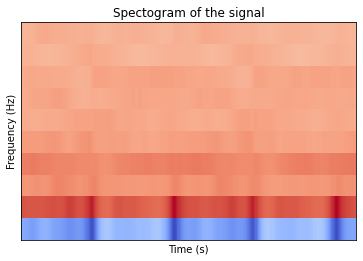

In [11]:
n_fft = 1*fs 
win_length = n_fft 
mfcc = librosa.feature.mfcc(signal, n_fft=n_fft, win_length=win_length, n_mfcc=10)

librosa.display.specshow(mfcc, sr=fs, hop_length=hop_length)
plt.title("Spectogram of the signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()